---
title: Fabry-Perot Cavities
date: 2025-01-26
authors:
  - name: Craig Cahillane
    orcid: 0000-0002-3888-314X
    affiliations:
      - Syracuse University
numbering:
  heading_1: true
  heading_2: true
  heading_3: true
---

A Fabry-Perot two-mirror optical cavity is the fundamental building block of laser physics.\
With it, we have built the first lasers and masers,
created optical clocks
and detected gravitational waves.

Here we will dive deeply into the basics of a Fabry-Perot.\
We will come back to this formalism a dozen times throughout this course, 
and develop some matrix mechanics and other math required to understand it.

In [1]:
#| "tags": [ "hide-input",]
%matplotlib widget
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import *

plt.style.use('dark_background')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": False,
        "figure.figsize": (9, 6),
        # "figure.autolayout": True,
        # "font.family": "serif",
        # "font.serif": "georgia",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

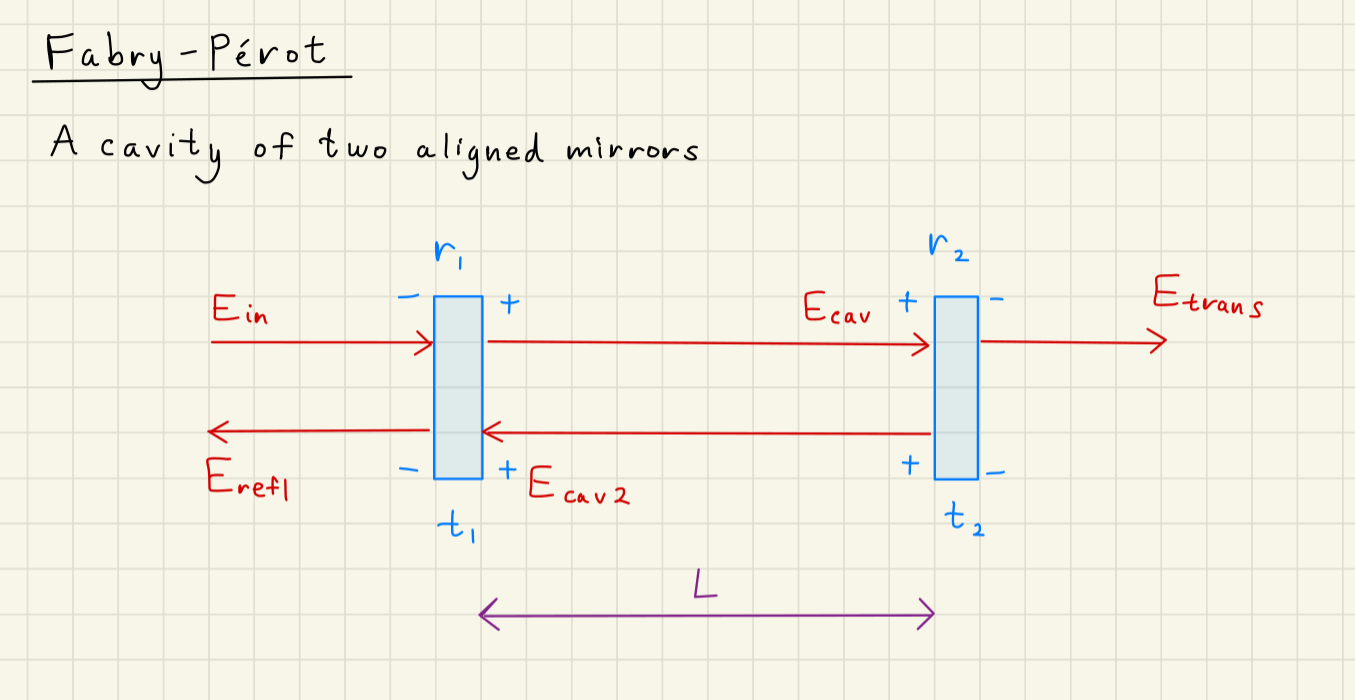

Fabry-Perot illustration

A Fabry-Perot cavity is two mirrors aligned with some space $L$ between them.\
The mirrors are labeled $r_1$ and $r_2$, which represents their *amplitude reflectivity*,\
and $t_1$ and $t_2$ which are the *amplitude transmission*.\
The amplitude coefficients are related to our more commonly reported *power reflectivity* $R$ and *power transmission* $T$ like
\begin{align}
R = |r|^2, \quad T = |t|^2
\end{align}

The red arrows represent electric fields, which act as nodes on a directed graph.
The arrow direction illustrates the transitions on the graph.\
We have one input above: $E_\mathrm{in}$, which represents the input laser.\
$E_\mathrm{in}$ represents all the field strength that will interact with the cavity.

$E_\mathrm{in}$ will have two transitions: one to $E_\mathrm{cav}$, and another to $E_\mathrm{refl}$.
These represent the intracavity field and the cavity reflected field.
These will be influenced by the reflectivity of the mirrors, as we will see.

Note we have two outputs from our system: $E_\mathrm{refl}$ and $E_\mathrm{trans}$.\
$E_\mathrm{trans}$ represets the total cavity transmitted field.\
Because power must be conserved, we can write the following:
\begin{align}
P_\mathrm{in} &= P_\mathrm{out}\\
|E_\mathrm{in}|^2 &= |E_\mathrm{refl}|^2 + |E_\mathrm{trans}|^2
\end{align}
The above power conservation assumes no loss inside the Fabry-Perot cavity.

We will assume that our incident $E_\mathrm{in}$ is a plane-wave, and we'll find the plane-wave solutions to the Fabry-Perot cavity below.

# Scattering Matrices
Before we dive into the analysis of the Fabry Perot, we need to understand its parts.
We will investigate the effect of mirrors and propogation distances on electric fields,
and how these can be described with *scattering matrices*.

## General Scattering Matrix
Suppose we have two electric fields $E_1$ and $E_2$ incident on an general optical object $\boldsymbol{M}$.  
$E_1$ and $E_2$ are both electric field phasors with the same optical axis, frequency, and polarization, 
but opposite wavenumbers $\boldsymbol{k}_1 = -\boldsymbol{k}_2$.

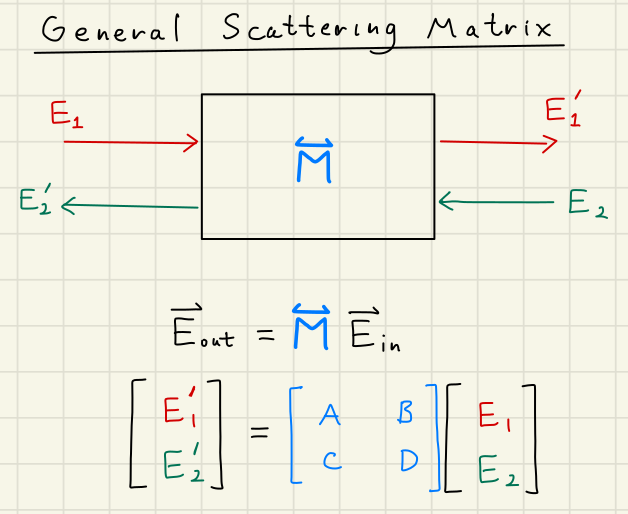

We can describe their interaction $\boldsymbol{M}$ like
\begin{align}
\vec{E}_\mathrm{out} &= \boldsymbol{M} \vec{E}_\mathrm{in}\\
\begin{bmatrix} E_1' \\ 
E_2'
\end{bmatrix} 
&= \begin{bmatrix} A & B \\ 
 C & D
\end{bmatrix} 
\begin{bmatrix} E_1 \\ 
E_2
\end{bmatrix} 
\end{align}

The components $A$ and $D$ describe the action of the object $\boldsymbol{M}$ on the beam transmitted through the object: 
$$E_1' = A E_1 \\ E_2' = D E_2 $$
This can include phase changes, absorption, and transmission coefficients.\
However, the object may partially or totally reflect the incident beams back along the optical axis.
This is described by the $B$ and $D$ components.

In this manner, we have described a *general $2 \times 2$ scattering matrix* for our beams travelling in two directions.\
One can imagine that we can add many different bases to make an $n \times n$ scattering matrix, 
describing changes to the electric field frequencies, polarization, or direction.\
The $2 \times 2$ scattering matrix is good enough for our plane-wave Fabry-Perot solutions, as we'll see below.

## Propogation Distance
First we describe a simple length propogation matrix over a distance $L$.

In this case, $E_1$ travels an additional distance $L$, accruing an extra phase $\phi = k L$.\
Additionally, $E_2$ travels an additional distance $-L$, but in the $-k$ direction, yielding the same positive phase accrued $\phi = (-k)(-L) = k L$.\
No exchange between $E_1$ and $E_2$ occurs, so we get the final *length propogating matrix$:

\begin{align}
\vec{E}_\mathrm{out} &= \boldsymbol{S}(L) \vec{E}_\mathrm{in}\\
\begin{bmatrix} E_1' \\ 
E_2'
\end{bmatrix} 
&= \begin{bmatrix} e^{i k L} & 0 \\ 
 0 & e^{i k L}
\end{bmatrix} 
\begin{bmatrix} E_1 \\ 
E_2
\end{bmatrix} 
\end{align}

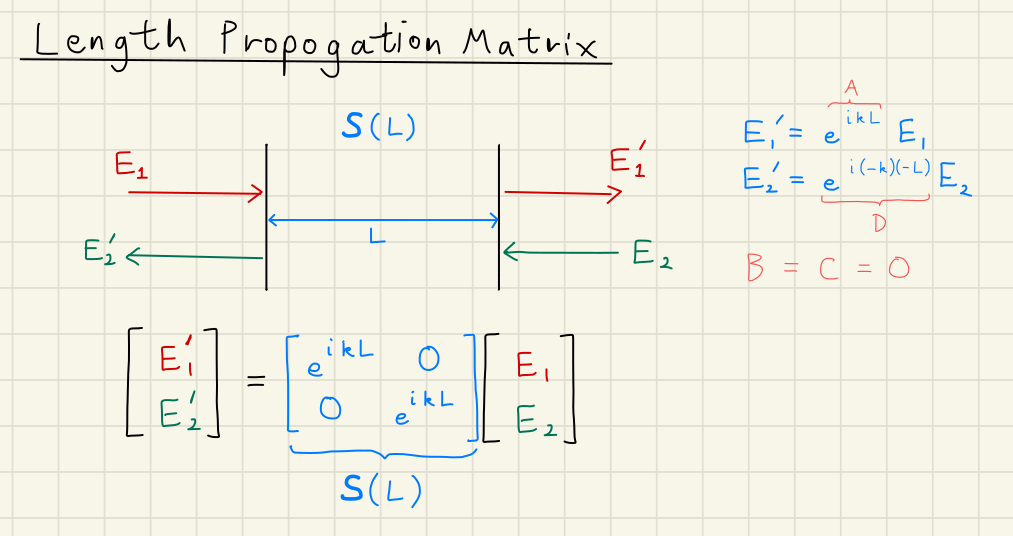

## Mirror Matrix

A mirror matrix defines our first non-trivial interaction between $E_1$ and $E_2$.\
A reflection can occur at any interface between two materials with different indices of refraction $n_1$, $n_2$.

Our drawing indicates that $E_1$ is incident on the front surface of the mirror.\
In other words, $E_1$ is traveling from a lower index of refraction $n_1$ to a higher one $n_2$.
The reflectivity of the mirror $r$ causes some of the incident field to be reemitted back in the direction it came, toward $E_2'$.

Due to the *Fresnel relations*, $E_1$ incurs a phase flip, giving the full reflection coefficient to be
$E_2' = -r E_1$.\
If we add in the transmission $t$ of $E_2$ to $E_2'$, we get the full expression for $E_2'$.\
A similar process can be performed for $E_1'$ as well, only this time we use $+r$ because we are going from high index $n_2$ to low index $n_1$:
\begin{align}
E_1' &= t E_1 + r E_2\\
E_2' &= -r E_1 + t E_2
\end{align}

\begin{align}
\vec{E}_\mathrm{out} &= \boldsymbol{M}(r,t) \vec{E}_\mathrm{in}\\
\begin{bmatrix} E_1' \\ 
E_2'
\end{bmatrix} 
&= \begin{bmatrix} t & r \\ 
 -r & t
\end{bmatrix} 
\begin{bmatrix} E_1 \\ 
E_2
\end{bmatrix} 
\end{align}


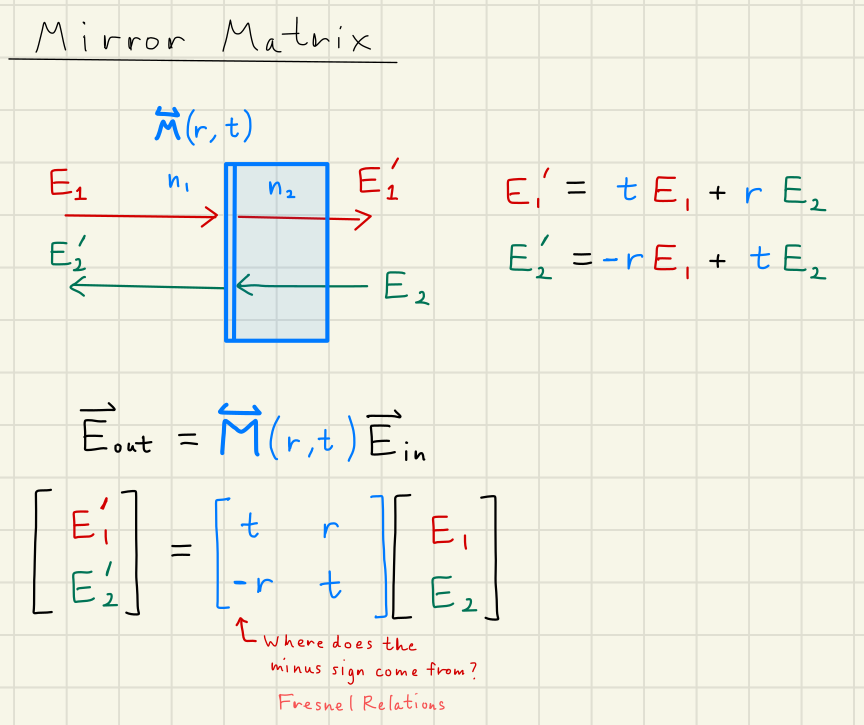

```{exercise}
:label: beamsplitter-matrix-exercise

Set up and draw a beamsplitter scattering matrix.\
Assume everything is in the same polarization (s-pol, *parallel* to the beamsplitter surface)
```

```{solution} beamsplitter-matrix-exercise
:label: beamsplitter-matrix-exercise-solution
:class: dropdown

Here is one option for the beamsplitter matrix.\
Note that we label the front of the beamsplitter with a minus sign to help us put down correct Fresnel relations signs on our reflected signals.

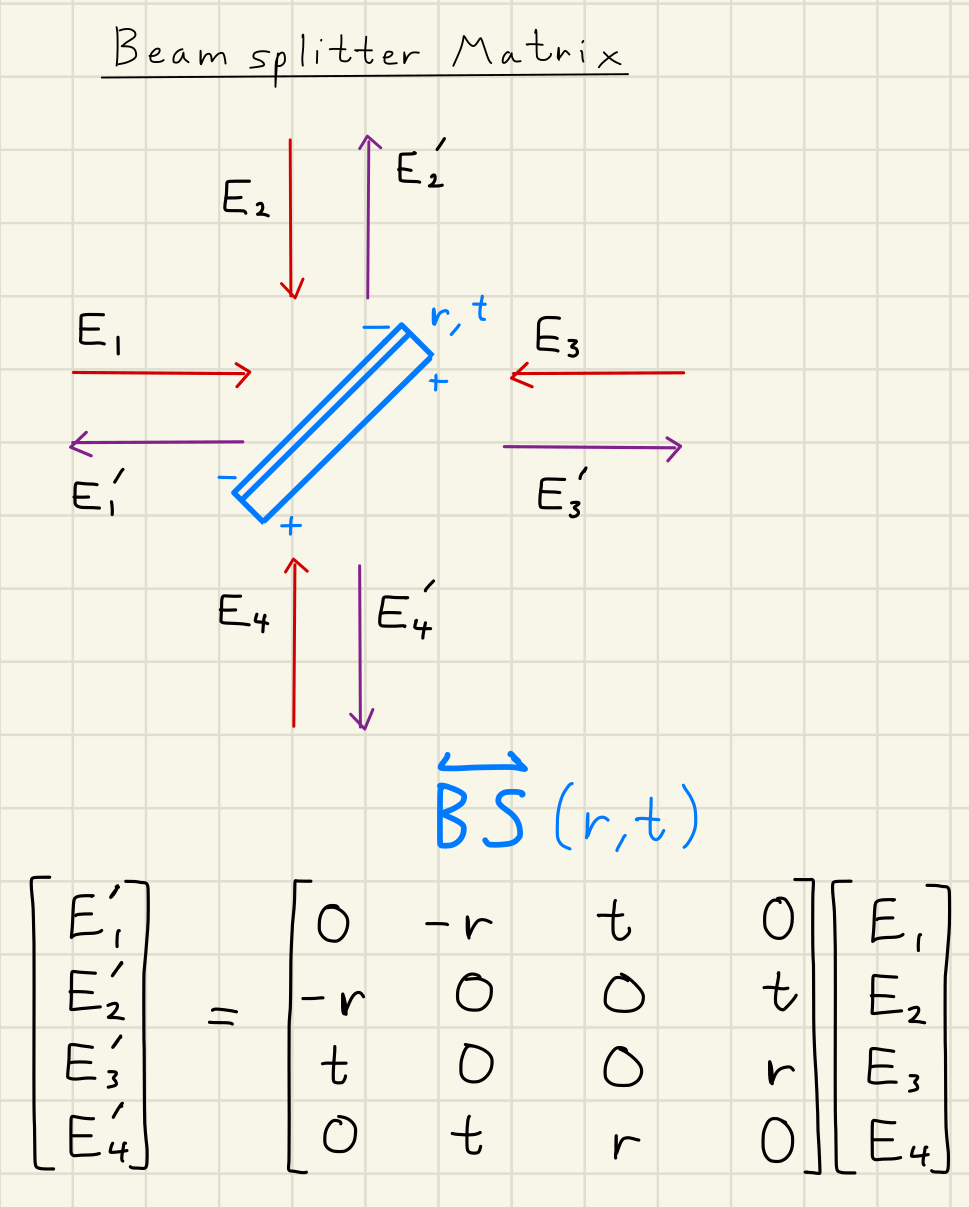
```

```{exercise}
:label: mirror-matrix-power-conservation-exercise

Does our mirror matrix conserve power?\
Calculate and compare $P_\mathrm{in}$ vs $P_\mathrm{out}$, remembering that $P = |E|^2$\
Assume that $E_1$ and $E_2$ are phasors of the same frequency.
```

```{solution} mirror-matrix-power-conservation-exercise
:label: mirror-matrix-power-conservation-exercise-solution
:class: dropdown

Let the input phasors 
$$E_1 = |E_1| e^{i \omega_0 t } \qquad E_2 = |E_2| e^{i (\omega_0 t + \phi) }$$

Then 
\begin{align}
P_\mathrm{in1} &= |E_1|^2\\
P_\mathrm{in2} &= |E_2|^2\\
\end{align}

Recalling 
\begin{align}
E_1' &= t E_1 + r E_2\\
E_2' &= -r E_1 + t E_2
\end{align}

\begin{align}
P_\mathrm{out1} &= |E_1'|^2 \\
P_\mathrm{out1} &= |t E_1 + r E_2|^2 \\
P_\mathrm{out1} &= (t E_1 + r E_2)(t E_1 + r E_2)^* \\
P_\mathrm{out1} &= t^2 |E_1|^2 + r^2 |E_2|^2 + r t (E_1 E_2^* + E_1^* E_2) \\
P_\mathrm{out1} &= t^2 |E_1|^2 + r^2 |E_2|^2 + r t |E_1| |E_2| (e^{i \omega_0 t} e^{-i (\omega_0 t + \phi)} + e^{-i \omega_0 t} e^{i (\omega_0 t + \phi)})\\
P_\mathrm{out1} &= t^2 |E_1|^2 + r^2 |E_2|^2 + r t |E_1| |E_2| (e^{-i \phi} + e^{i \phi}) \\
P_\mathrm{out1} &= t^2 |E_1|^2 + r^2 |E_2|^2 + 2 r t |E_1| |E_2| \cos(\phi) 
\end{align}

Similarly for $P_\mathrm{out2}$:
\begin{align}
P_\mathrm{out2} &= |E_2'|^2 \\
P_\mathrm{out2} &= r^2 |E_1|^2 + t^2 |E_2|^2 - 2 r t |E_1| |E_2| \cos(\phi) 
\end{align}

Then $P_\mathrm{out}$ yields
\begin{align}
P_\mathrm{out} &= P_\mathrm{out1} + P_\mathrm{out2}\\
P_\mathrm{out} &= t^2 |E_1|^2 + r^2 |E_2|^2 + 2 r t |E_1| |E_2| \cos(\phi)\\
               &+ r^2 |E_1|^2 + t^2 |E_2|^2 - 2 r t |E_1| |E_2| \cos(\phi)\\
P_\mathrm{out} &= (t^2 + r^2) |E_1|^2 + (t^2 + r^2) |E_2|^2 \\
P_\mathrm{out} &= (t^2 + r^2) P_\mathrm{in1} + (t^2 + r^2) P_\mathrm{in2} \\
\end{align}

So power incident on the mirror is conserved iff 
\begin{align}
\label{eq:lossless_mirror}
\boxed{t^2 + r^2 = 1}
\end{align}

This derivation is very dense, so we'll unpack some important results here.

First, notice the importance of our Fresnel conditions giving $-r$ and $+r$ coefficients of reflection.
Power would not be conserved without it.

Second, the individual power terms $P_\mathrm{out1}$ and $P_\mathrm{out2}$ exhibit clear *interference*.
Without adjusting any input power levels, 
I can switch the power coming out of the mirror from one side to the other by adjusting the relative phase $\phi$.

Equation [](#eq:lossless_mirror) is an extremely important power conservation condition never achieved for real mirrors.\
There is always some loss, either from direct absorption of the incident light, or scattering of light away from normal incidence by surface imperfections.

We call anything that causes our laser to lose power *loss* $\mathcal{L}$,
and this can be incorporated into Eq [](#eq:lossless_mirror) via
\begin{align}
\label{eq:lossy_mirror}
\boxed{T + R + \mathcal{L} = 1}
\end{align}
where we have written $T = t^2$ and $R + r^2$ in terms of their more-commonly-used power coefficients.

To see a plot of $P_\mathrm{out1}$ and $P_\mathrm{out2}$ as a function of $\phi$, open the lower two Source and Output tabs.
```

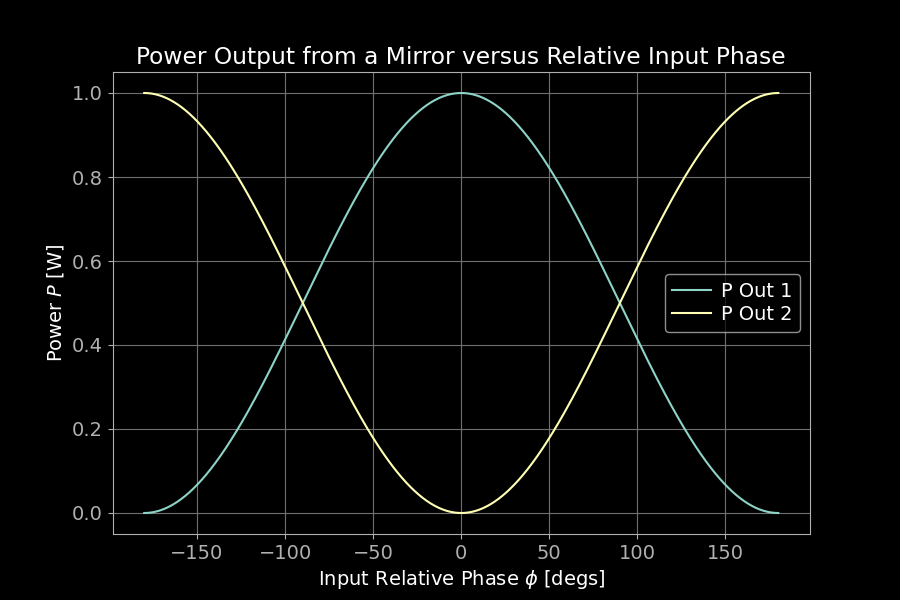

In [2]:
#| "tags": [ "hide-input", "hide-output",]
phis = np.linspace(-np.pi, np.pi, 1000)

rr = np.sqrt(0.5) # mirror amplitude reflection
tt = np.sqrt(0.5) # mirror amplitude transmission
p_in1 = 0.5 # watt
p_in2 = 0.5 # watt
p_out1 = tt**2 * p_in1 + rr**2 * p_in2 + 2 * rr * tt * np.sqrt(p_in1 * p_in2) * np.cos(phis)
p_out2 = rr**2 * p_in1 + tt**2 * p_in2 - 2 * rr * tt * np.sqrt(p_in1 * p_in2) * np.cos(phis)

fig, ax1 = plt.subplots(1)

ax1.plot(180/np.pi*phis, p_out1, label=r"P Out 1")
ax1.plot(180/np.pi*phis, p_out2, label=r"P Out 2")

ax1.grid()
ax1.set_title("Power Output from a Mirror versus Relative Input Phase")
ax1.set_xlabel(r"Input Relative Phase $\phi$ [degs]")
ax1.set_ylabel("Power $P$ [W]")
ax1.legend()
plt.show()

# Fabry Perot Solutions

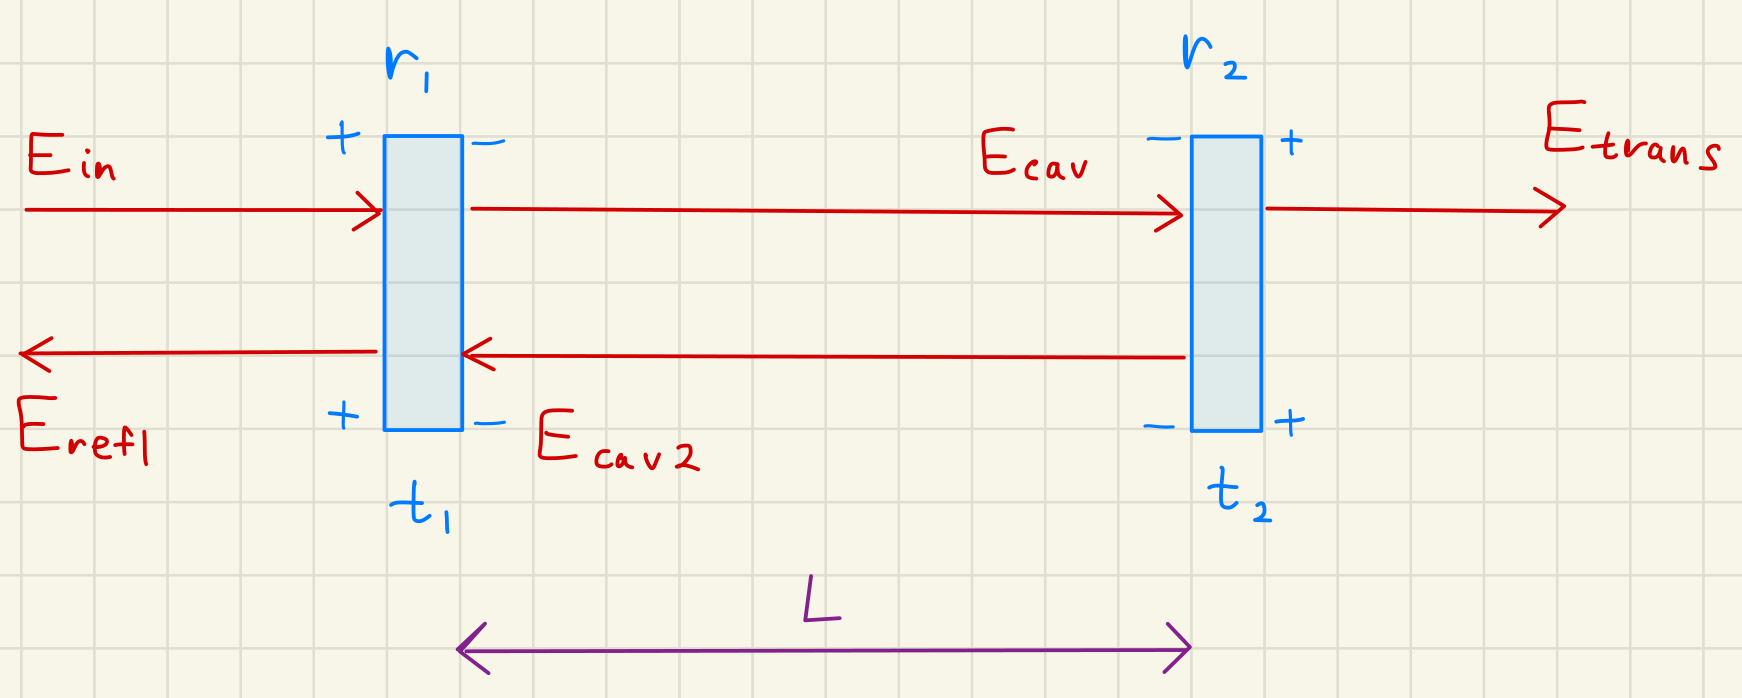

Using the matrices above, we are ready to assemble our Fabry-Perot interferometer.

First, we will go through and assemble a vector of our electric fields $\vec{E}$:
\begin{align}
\vec{E} &= \begin{bmatrix} 
E_\mathrm{in} \\ 
E_\mathrm{cav} \\ 
E_\mathrm{cav2} \\ 
E_\mathrm{refl} \\ 
E_\mathrm{trans}
\end{bmatrix} 
\end{align}
We neglect any phase propogation other than inside the cavity length $L$.\

Now we examine each element of our electric fields and write out a system of equations for each of them.\
We pick out our source terms, $E_\mathrm{in}$ in this case, 
and ignore them for the time being, 
as they have no relationship to the dynamics of the cavity itself, 
they only source the field for it.
\begin{align}
E_\mathrm{cav}   &= -r_1 e^{i k L} E_\mathrm{cav2} + t_1 E_\mathrm{in}\\ 
E_\mathrm{cav2}  &= -r_2 e^{i k L} E_\mathrm{cav} \\ 
E_\mathrm{refl}  &=  t_1 e^{i k L} E_\mathrm{cav2} + r_1 E_\mathrm{in} \\ 
E_\mathrm{trans} &=  t_2 e^{i k L} E_\mathrm{cav}
\end{align}

Hopefully, with some examination of the diagram, it can become clear where the above systems of equations came from.
$E_\mathrm{cav}$ represents the electric field just coming off the input mirror inside the cavity heading toward the end mirror, while\
$E_\mathrm{cav2}$ represents the same field for the end mirror, heading toward the input mirror.\
$E_\mathrm{cav}$ is sourced by two fields: 
1. $E_\mathrm{in}$ being transmitted through the input mirror $t_1$,
2. $E_\mathrm{cav2}$ propogating the full cavity length $L$, accruing $\phi = k L$ phase,\
then reflecting off the front of the input mirror, gaining the reflection coefficient $-r_1$


## Intracavity Field $E_\mathrm{cav}$
Here we will solve the intracavity field $E_\mathrm{cav}$ directly from our equations above.\
We can eliminate $E_\mathrm{cav2}$ from $E_\mathrm{cav}$ by subbing in the second equation above:
\begin{align}
E_\mathrm{cav} &= -r_1 e^{i k L} E_\mathrm{cav2} + t_1 E_\mathrm{in}\\
E_\mathrm{cav} &= -r_1 e^{i k L} (-r_2 e^{i k L} E_\mathrm{cav}) + t_1 E_\mathrm{in}\\
E_\mathrm{cav} &= r_1 r_2 e^{i 2 k L} E_\mathrm{cav} + t_1 E_\mathrm{in}
\end{align}
which, by subtracting over $E_\mathrm{cav}$ and solving for it, yields
\begin{align}
\label{eq:intracavity_field}
\boxed{ E_\mathrm{cav} = \dfrac{ t_1 }{ 1 - r_1 r_2 e^{i 2 k L} } E_\mathrm{in} }
\end{align}

Below we have a magnitude and phase plot of the intracavity field as a function of the *round-trip phase* $\phi = 2 k L$.\
We will often use the round-trip phase rather than cavity length or input laser frequency,
as those are degenerate with one another.


## Transfer Function
A *transfer function* is a general measure of the linear relationship of one signal to another.\
In this case, linear means that action at one frequency $\omega$ in the input *x(t)* causes the action in the output *y(t)*:
$$
Y(\omega) = H(\omega) X(\omega)
$$
where $X(\omega)$, $Y(\omega)$ are the Fourier transforms of the input and output signals $x(t)$, $y(t)$,
and $H(\omega)$ is the transfer function between them.

A Bode plot is just the plot of the magnitude and phase of a function as frequency.\
We can consider the below plot as a transfer function from the input $E_\mathrm{in}$ to the output $E_\mathrm{cav}$ if we rewrite Eq. [](#eq:intracavity_field) as
\begin{align}
\dfrac{E_\mathrm{cav}}{E_\mathrm{in}}(\omega) = \dfrac{ t_1 }{ 1 - r_1 r_2 e^{i 2 \omega L / c} }
\end{align}

In [3]:
def ecav_fp(phis, ein, trans1, trans2, loss1=0, loss2=0):
    """Calculates the intracavity field ecav for a Fabry-Perot cavity.
    phis: float
        Round-trip phase phi = 2 k L [radians]
    ein: float
        Input electric field amplitude [sqrt watts]
    trans1: float
        Input mirror power transmission T1
    loss1: float
        Input mirror loss L1
    loss2: float
        End mirror loss L2      
    """
    # Set up amplitude reflectivities
    t1 = np.sqrt(trans1)
    t2 = np.sqrt(trans2)
    r1 = np.sqrt(1 - loss1 - trans1)
    r2 = np.sqrt(1 - loss2 - trans2)
    
    ecav = ein * t1 / (1 - r1 * r2 * np.exp(1j * phis))
    return ecav

In [4]:
# Define a cavity
phis2 = np.linspace(-3*np.pi, 3*np.pi, 10000)

# mirror power transmissions
trans1 = 0.25
trans2 = 0.25 
loss1 = 0 # no loss for now
loss2 = 0
ein = 1 # rtWatts

# Calculate intracavity field
ecav = ecav_fp(phis2, ein, trans1, trans2, loss1, loss2)

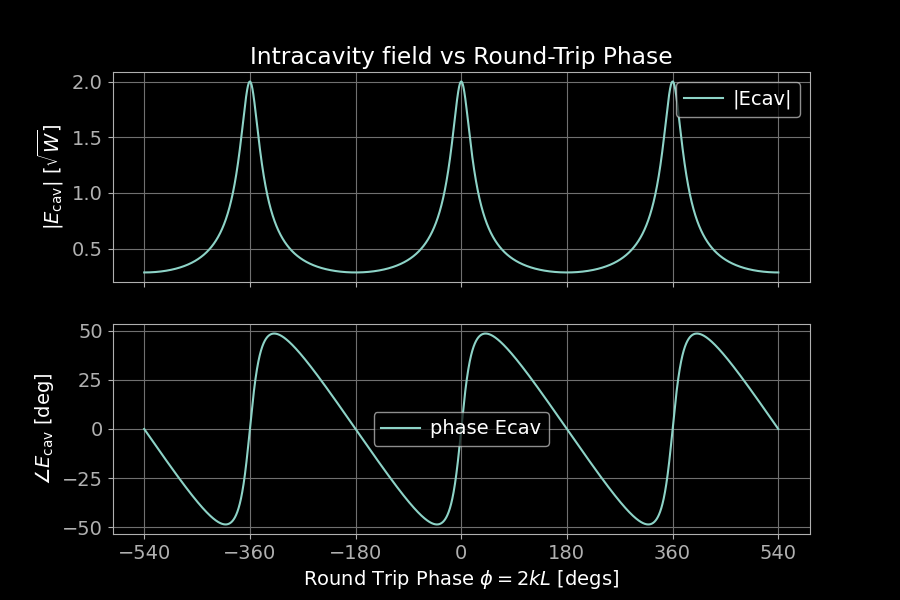

In [5]:
# Make a Bode plot of the cavity transmission
fig2, (ax21, ax22) = plt.subplots(2, sharex=True)

ax21.plot(180/np.pi*phis2, np.abs(ecav), label="|Ecav|")
ax22.plot(180/np.pi*phis2, np.angle(ecav, deg=True), label="phase Ecav")

ax21.set_xticks(180*np.arange(-3,4))
ax21.grid()
ax21.set_title("Intracavity field vs Round-Trip Phase")
# ax21.set_xlabel(r"Input Relative Phase $\phi$ [degs]")
ax21.set_ylabel(r"$|E_\mathrm{cav}|$ [$\sqrt{W}$]")
ax21.legend()

ax22.grid()
# ax22.set_title("")
ax22.set_xlabel(r"Round Trip Phase $\phi = 2 k L$ [degs]")
ax22.set_ylabel(r"$\angle E_\mathrm{cav}$ [deg]")
ax22.legend()

plt.show()

## Complex Lorentzian
Equation [](#eq:intracavity_field) has a very interesting form, as can be seen from the magnitude and phase plot above.
There is a regular phasor $e^{i 2 \omega L / c}$ in the denominator.
If we are very near resonance ($\omega \approx c / (2 L)$),
then we can write 
$$e^{i 2 \omega L / c} \approx 1 + i 2 \omega L / c $$
And our intracavity field becomes what is called a *complex Lorentzian*:
\begin{align}
\label{eq:intracavity_power_approx}
E_\mathrm{cav} = \dfrac{ t_1 }{ 1 - r_1 r_2 (1 + i 2 \omega L / c) } E_\mathrm{in} \\
E_\mathrm{cav} = \dfrac{ t_1 }{ 1 - r_1 r_2 - i 2 r_1 r_2 \omega L / c } E_\mathrm{in} 
\end{align}

This is the form of many resonances, including optical cavities, but also atomic resonances in laser gain media

interactive(children=(FloatSlider(value=0.25, description='$T_1$:', max=1.0, readout_format='.3f', step=0.01),…

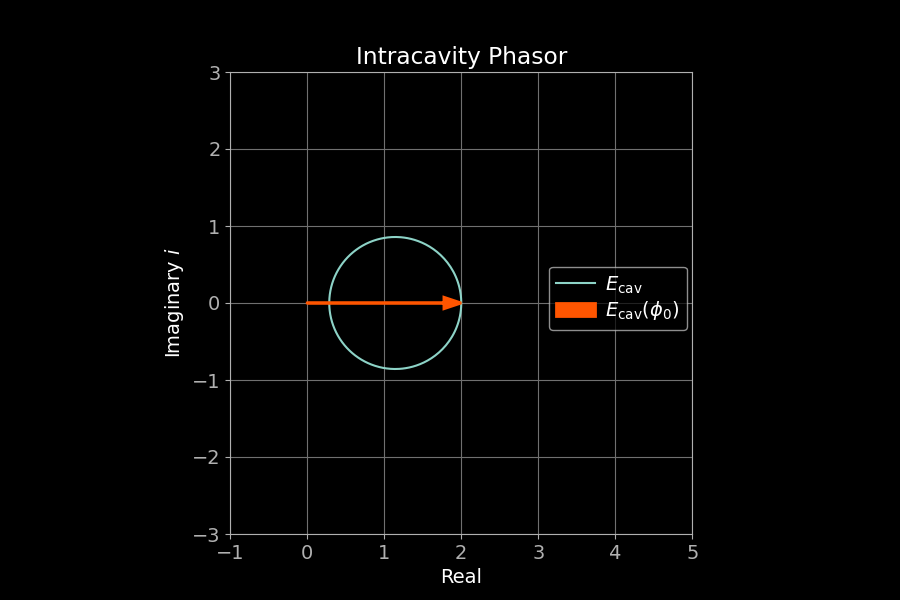

In [6]:
#| label: fig:interactive_ecav
#| "tags": [ "hide-input",]
fig3 = plt.figure()
ax3 = fig3.add_subplot()

phi0 = 0
phis3 = np.linspace(0, 2 * np.pi, 10000)

trans1 = 0.25
trans2 = 0.25 
ein = 1 # rtWatts

plot_ecav0 = ecav_fp(phi0, ein, trans1, trans2)
plot_ecav = ecav_fp(phis3, ein, trans1, trans2)

plot_real_ecav0 = np.real(plot_ecav0)
plot_imag_ecav0 = np.imag(plot_ecav0)
plot_real_ecav = np.real(plot_ecav)
plot_imag_ecav = np.imag(plot_ecav)

# line1, = ax3.plot([0, plot_real_ecav0], [0, plot_imag_ecav0], 'o-', label=r"$E_mathrm{cav}(\phi_0)$")
arc1, = ax3.plot(plot_real_ecav, plot_imag_ecav, label=r"$E_\mathrm{cav}$")

arrow1 = ax3.arrow(0, 0, plot_real_ecav0, plot_imag_ecav0, shape='full', color="#ff5500", lw=2, 
                  length_includes_head=True, head_width=.15, zorder=2, label=r"$E_\mathrm{cav}(\phi_0)$")

ax3.set_xlabel("Real")
ax3.set_ylabel("Imaginary $i$")
ax3.set_xlim([-1, 5])
ax3.set_ylim([-3, 3])
ax3.grid()

ax3.set_title(r"Intracavity Phasor")

ax3.legend(bbox_to_anchor=(1.01, 0.6))
ax3.set_aspect('equal')
# plt.tight_layout()

def update_ecav(
    trans1_slider_value=trans1,
    trans2_slider_value=trans2,
    phi0_slider_value=phi0
):
    """
    Create an interactive intracavity field phasor plot
    """
    new_trans1 = trans1_slider_value
    new_trans2 = trans2_slider_value
    new_phi0 = phi0_slider_value
    
    new_plot_ecav = ecav_fp(phis, ein, new_trans1, new_trans2)
    new_plot_xxs = np.real(new_plot_ecav)
    new_plot_yys = np.imag(new_plot_ecav)
    
    new_plot_ecav0 = ecav_fp(new_phi0, ein, new_trans1, new_trans2)
    new_plot_xx0 = np.real(new_plot_ecav0)
    new_plot_yy0 = np.imag(new_plot_ecav0)
    
    new_xxs = new_plot_xxs
    new_yys = new_plot_yys

    arc1.set_xdata(new_xxs)
    arc1.set_ydata(new_yys)
    arrow1.set_data(x=0, y=0, dx=new_plot_xx0, dy=new_plot_yy0)
    
    fig3.canvas.draw_idle()
    return

# Create interactive widget
trans1_slider = FloatSlider(
    value=trans1,
    min=0,
    max=1,
    step=0.01,
    description="$T_1$:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
trans2_slider = FloatSlider(
    value=trans2,
    min=0,
    max=1,
    step=0.01,
    description="$T_2$:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
phi0_slider = FloatSlider(
    value=phi0,
    min=0,
    max=2*np.pi,
    step=0.01,
    description=r"$\phi_0$:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

interact(
    update_ecav, 
    trans1_slider_value=trans1_slider, 
    trans2_slider_value=trans2_slider,
    phi0_slider_value=phi0_slider,
)
plt.show()

```{exercise}
:label: fabry-perot-exercise

Derive the same expressions as Equation [](#eq:intracavity_field) for $E_\mathrm{cav2}$, $E_\mathrm{refl}$, and $E_\mathrm{trans}$.

Do you notice anything interesting about the denominator for these terms?

What happens for $E_\mathrm{refl}$ that is different for the others?
```

```{solution} fabry-perot-exercise
:label: fabry-perot-exercise-solution
:class: dropdown

\begin{align}
E_\mathrm{cav2} &= \dfrac{- t_1 r_2 e^{i k L}}{1 - r_1 r_2 e^{i 2 k L}} E_\mathrm{in}\\
E_\mathrm{refl} &= \dfrac{r_1 - r_2 (r_1^2 + t_1^2) e^{i 2 k L}}{1 - r_1 r_2 e^{i 2 k L}} E_\mathrm{in}\\
E_\mathrm{trans} &= \dfrac{t_1 t_2 e^{i k L}}{1 - r_1 r_2 e^{i 2 k L}} E_\mathrm{in}
\end{align}

All the denominators are the same.  This is something we see in control theory, or any directed graph situation.
The expression $r_1 r_2 e^{i 2 k L}$ is the *open loop gain*, meaning that if we let a light ray experience only one round-trip of the cavity, it will be modified by that amount: 
$$E_\mathrm{k+1} = r_1 r_2 e^{i 2 k L} E_\mathrm{k}$$


```

## Resonance Condition
Equation [](#eq:intracavity_field) is our intracavity electric field.\
It depends on our mirror reflectivities $r_1$ and $r_2$, and is physical so long as $r_1 r_2 < 1$, which must be true is power is conserved.\
Interestingly, the intracavity power also depends on the cavity length $L$ and input laser wavenumber $k$.

In fact, if we set $L$ equal to some special values such that $e^{i 2 k L} = 1$, then we get a massive buildup of constructive interference inside the cavity, and Eq. [](#eq:intracavity_field) becomes 
\begin{align}
\label{eq:intracavity_field_resonance}
\boxed{ E_\mathrm{cav} = \dfrac{t_1}{1 - r_1 r_2} E_\mathrm{in} }
\end{align}
If the mirrors are extremely reflective such that $r_1 r_2 = 1 - \epsilon$,\
then we can get a huge resonant gain of the intracavity electric field.

Coming back to setting $e^{i 2 k L} = 1$, let's solve this for $L$:
\begin{align}
e^{i 2 k L} &= 1\\
2 k L &= 2 \pi n \qquad \forall n \in \mathbb{Z}\\
2 \dfrac{2 \pi}{\lambda} L &= 2 \pi n
\end{align}
yielding the *resonance condition*:
\begin{align}
\label{eq:resonance_condition}
\boxed{ L = \dfrac{\lambda}{2} n \qquad \forall n \in \mathbb{Z} }
\end{align}
The length of the cavity $L$ must be a half-integer of the laser wavelength $\lambda$ for the cavity to achieve resonant buildup of the intracavity power.

## Free Spectral Range
It is also convenient to know the Fabry-Perot's in terms of interogating it with plane waves of different frequencies.\
The *free spectral range*, or FSR, defines the input frequencies $\omega$ at which we achieve resonance.

Starting with Eq. [](#eq:resonance_condition), we simply sub in $\lambda = \dfrac{c}{\nu}$ and solve:
\begin{align}
\label{eq:free_spectral_range}
\boxed{ \nu = \dfrac{c}{2 L} n \qquad \forall n \in \mathbb{Z} }
\end{align}

In the literature, like Siegman's *Lasers*, 
sometimes the integer $q$ is used instead of $n$ to represent each resonant axial mode.

## Cavity Power Gain
We are often interested in using an optical cavity to enhance our laser power via the cavity's *optical gain* $G_\mathrm{cav}$.
Higher gain can make our gravitational wave detectors more sensitive to 

Here we calculate the power expression $P_\mathrm{cav} = |E_\mathrm{cav}|^2$:
\begin{align}
\label{eq:intracavity_power}
P_\mathrm{cav} &= \dfrac{ t_1^2 }{ 1 + r_1^2 r_2^2 - r_1 r_2 (e^{i 2 k L} + e^{-i 2 k L} ) } |E_\mathrm{in}|^2  \\
P_\mathrm{cav} &= \dfrac{ T_1 }{ 1 + R_1 R_2 - 2 r_1 r_2 \cos(2 k L) } P_\mathrm{in} 
\end{align}

The term modifying $P_\mathrm{in}$ is sometimes called the *cavity optical gain* $G_\mathrm{cav}$, and is usually assumed to be the max gain achieved when on resonance:
\begin{align}
P_\mathrm{cav} &= \dfrac{ T_1 }{ 1 + R_1 R_2 - 2 r_1 r_2 } P_\mathrm{in} \\
P_\mathrm{cav} &= G_\mathrm{cav} P_\mathrm{in}
\end{align}

A field amplitude gain term $g_\mathrm{cav}$ is also sometimes used for $\dfrac{E_\mathrm{cav}}{E_\mathrm{in}}$.
This gives us the relationship $G_\mathrm{cav} = |g_\mathrm{cav}|^2$.


## Linewidth
Now we want to analyze our Fabry-Perot cavity's *power buildup* while on and slightly off resonance.
The *linewidth*, or *bandwidth*, of a cavity is a very convenient measure of how much deviation in frequency is acceptable to still be considered "on-resonance".
This is also known as the Full-Width-Half-Maximum (FWHM) of the optical cavity $\omega_\mathrm{FWHM}$.

To find $\omega_\mathrm{FWHM}$, 
we use the gain power gain expression and \
The linewidth calculation is left as an excercise below.

```{exercise}
:label: fabry-perot-linewidth-exercise

Derive the general full-width half-maximum expression for a Fabry-Perot cavity.

*Hint*: Set $\dfrac{P_\mathrm{cav}(\omega)}{P_\mathrm{cav}(0)} = \dfrac{1}{2}$ and solve for $\omega$.  This will be the *half-width half-max*.

*Hint 2*: You may find it useful that $\cos(2\theta) = 1 - 2 \sin(\theta)^2$
```

```{solution} fabry-perot-linewidth-exercise
:label: fabry-perot-linewidth-exercise-solution
:class: dropdown

$$
\omega_\mathrm{FWHM} = \dfrac{2 c}{L} \arcsin\left( \dfrac{1 - r_1 r_2}{2 \sqrt{r_1 r_2} } \right)
$$
or, equivalently in units of Hz:
$$
\nu_\mathrm{FWHM} = \dfrac{c}{L \pi} \arcsin\left( \dfrac{1 - r_1 r_2}{2 \sqrt{r_1 r_2} } \right)
$$

```

## Cavity Finesse
The *cavity finesse* $\mathcal{F}$ refers to the fine-ness of the cavity resonances.\
This term is a hold-over from the days of etalons, when the width of fringes made by a curved mirror were used to measure the finesse.

The cavity finesse is just the ratio of the cavity's free spectral range and full-width-half-maximum:
\begin{align}
\label{eq:finesse}
\mathcal{F} = \dfrac{\mathrm{FSR}}{\nu_{\mathrm{FWHM}}}
\end{align}

This ratio gives us the spacing between resonances over the width of those resonances.

## Cavity Pole and Storage Time
Here we invoke a critical concept from complex algebra to describe the cavity dynamics.\
The *pole* of a transfer function is just the frequency where the denominator equals zero:

\begin{align}
\label{eq:cavity_pole}
1 &- r_1 r_2 e^{i 2 \omega_p L / c} = 0\\
\rightarrow i \omega_p &=  \dfrac{c}{2 L} \log\left(\dfrac{1}{r_1 r_2}\right)\\
i \nu_p &= \dfrac{1}{2 \pi} \dfrac{c}{2 L} \log\left(\dfrac{1}{r_1 r_2}\right)
\end{align}

This gives us a convenient way of defining *how fast* a cavity can respond to changes.\
It can be shown that the Fabry-Perot acts as a *low-pass filter*, which resonates and transmits disturbances at frequencies below the cavity pole, 
but rejects disturbances above it.
Equivalentally, the inverse of the pole is often called the *storage time* $\tau_\mathrm{storage}$, 
\begin{align}
\label{eq:storage_time}
\tau_\mathrm{storage} = \dfrac{1}{\nu_p}
\end{align}
The storage time represents how long it takes to fill the cavity with light to its steady state.\
One homework 2 problem will ask us to compute the storage time via a geometric series.

In the high-finesse limit, the cavity pole equals half the full-width half-maximum:
\begin{align}
\nu_p \approx \dfrac{1}{2} \nu_{FWHM}
\end{align}

So the cavity pole $\omega_p$ is another convenient measure of the cavity *bandwidth*.


## Cavity Couplings

Finally, we discuss the Fabry-Perot cavity coupling in the context of the reflected electric field.
The reflected electric field transfer function is written as 
\begin{align}
\label{eq:erefl}
\dfrac{ E_\mathrm{refl} }{ E_\mathrm{in} }(\phi) &= \dfrac{ r_1 - r_2 (r_1^2 + t_1^2) e^{i \phi} }{ 1 - r_1 r_2 e^{i \phi} }\\
\dfrac{ E_\mathrm{refl} }{ E_\mathrm{in} }(0) &= \dfrac{ r_1 - r_2 }{ 1 - r_1 r_2 } 
\end{align}
where the round-trip phase $\phi = 2 k L$ was set to zero, putting us on resonance, 
and the input mirror made lossless, allowing $r_1^2 + t_1^2 = 1$.

Equation [](#eq:erefl) illustrates an important relationship between $r_1$ and $r_2$.\
If $r_1 = r_2$, we get exactly zero reflected light coming from the Fabry-Perot.\
This is known as *critical coupling*.

With critical coupling, we achieve perfect destructive interference from our two contributing fields at the reflected field:\
$E_\mathrm{in}$ and $E_\mathrm{cav2}$ both contribute equal quantities to $E_\mathrm{refl}$, but completely out of phase.\
Additionally, because $E_\mathrm{refl} = 0$, 
then $P_\mathrm{trans}$ accounts for all of the input power: $P_\mathrm{in} = P_\mathrm{trans}$.\
**Thus, by aligning and resonating a laser between two mirrors, we can pass the laser fully through two mirrors**

Similarly, we have the unequal conditions:
1. Overcoupled: $r_1 < r_2$
2. Undercoupled: $r_1 > r_2$

We will find that overcoupled cavities promote high power in the cavity, and are therefore used in gravitational wave detectors.\
One HW2 problem reviews this.
Overcoupled cavities do exhibit a right-hand-plane zero, which is occasionally problematic due to the loss of phase the RHP zero imposes on the reflected Fabry-Perot light.


In [7]:
def erefl_fp(phis, ein, trans1, trans2, loss1=0, loss2=0):
    """Calculates the reflected field Erefl for a Fabry-Perot cavity.
    phis: float
        Round-trip phase phi = 2 k L [radians]
    ein: float
        Input electric field amplitude [sqrt watts]
    trans1: float
        Input mirror power transmission T1
    loss1: float
        Input mirror loss L1
    loss2: float
        End mirror loss L2      
    """
    # Set up amplitude reflectivities
    t1 = np.sqrt(trans1)
    t2 = np.sqrt(trans2)
    r1 = np.sqrt(1 - loss1 - trans1)
    r2 = np.sqrt(1 - loss2 - trans2)
    
    erefl = ein * (r1 - (r1**2 + t1**2) * r2 * np.exp(1j * phis)) / (1 - r1 * r2 * np.exp(1j * phis))
    return erefl

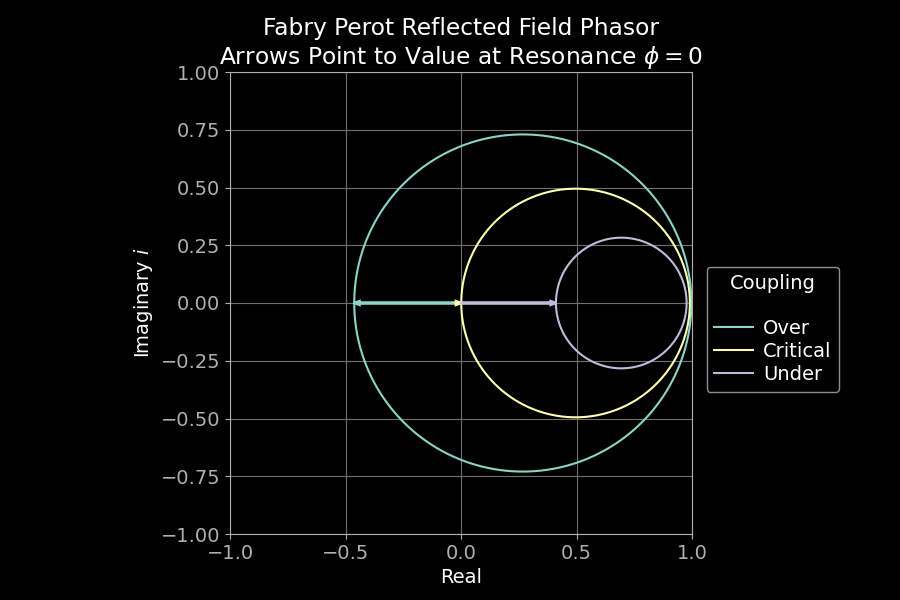

In [19]:
#| label: fig:erefl
#| "tags": [ "hide-input",]
fig4, ax4 = plt.subplots(1)

phi0 = 0
phis3 = np.linspace(0, 2 * np.pi, 10000)

trans1 = 0.25
trans2s = [0.10, 0.25, 0.50]
labels = ["Over", "Critical", "Under"]

ein = 1 # rtWatts

for ii, trans2, label in zip(range(len(trans2s)), trans2s, labels):
    plot_erefl0 = erefl_fp(phi0, ein, trans1, trans2)
    plot_erefl = erefl_fp(phis3, ein, trans1, trans2)
    
    plot_real_erefl0 = np.real(plot_erefl0)
    plot_imag_erefl0 = np.imag(plot_erefl0)
    plot_real_erefl = np.real(plot_erefl)
    plot_imag_erefl = np.imag(plot_erefl)
    
    # line1, = ax3.plot([0, plot_real_erefl0], [0, plot_imag_erefl0], 'o-', label=r"$E_mathrm{cav}(\phi_0)$")
    arc1, = ax4.plot(plot_real_erefl, plot_imag_erefl, label=label)
    
    arrow1 = ax4.arrow(0, 0, plot_real_erefl0, plot_imag_erefl0, shape='full', color=arc1.get_color(), lw=2, 
                      length_includes_head=True, head_width=.015, zorder=2)

ax4.set_xlabel("Real")
ax4.set_ylabel("Imaginary $i$")
ax4.set_xlim([-1, 1])
ax4.set_ylim([-1, 1])
ax4.grid()

ax4.set_title("Fabry Perot Reflected Field Phasor\nArrows Point to Value at Resonance " + r"$\phi = 0$")

ax4.legend(bbox_to_anchor=(1.01, 0.6),title="Coupling\n")
ax4.set_aspect('equal')
plt.show()